### Installing Google Vision client lib

In [1]:
import os, signal

def restart_runtime():
  os.kill(os.getpid(), signal.SIGSTOP)

!pip install --upgrade google-cloud-vision
!killall ngrok
!pip install twilio flask requests flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ngrok: no process found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports the Google Cloud client library
from google.cloud import vision

# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting up authentication

In [3]:
# Setup Environment Variable - Vision AI application credentials 
path = "/content/drive/MyDrive/0 - UEB - Ingeniería de Sistemas - Semestres/9 Noveno Semestre/Sistemas Inteligentes/Corte 2/Actividades/Google Vision AI/sistemas-inteligentes-visionai-dda79b08a4ae.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = path

In [4]:
#Sign in with fran.romero.academico google account
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

#If neccesary, replace this authtoken

#Commented for security.
!/ngrok authtoken 2F0ojYECUe52Bh4pWESjEmlW20v_5piWHxvwpMTeFQfbHiKTc

/drive/ngrok-ssh
--2022-10-22 07:37:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 54.161.241.46, 18.205.222.128, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  5.54MB/s    in 2.4s    

2022-10-22 07:38:00 (5.54 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


### Using Google Vision client library

**Show Image and Web Annotations**

In [11]:
from skimage import io
import matplotlib.pyplot as plt

def show_image(image_uri):
  image = io.imread(image_uri)
  plt.imshow(image)
  plt.show()

def annotate(path):

    client = vision.ImageAnnotatorClient()

    if path.startswith('http') or path.startswith('gs:'):
        image = vision.Image()
        image.source.image_uri = path

    else:
        with io.open(path, 'rb') as image_file:
            content = image_file.read()

        image = vision.Image(content=content)

    web_detection = client.web_detection(image=image).web_detection

    return web_detection

def report(annotations):    

  global response
  response = []

  if annotations.web_entities:
      print('\n{} Web entities found: '.format(len(annotations.web_entities)))

      for entity in annotations.web_entities:
          description = '{}'.format(entity.description)
          
          response.append(description)

      return response

def conver_list(a):
    it = iter(a)
    res_dct = dict(enumerate(it))
    return res_dct

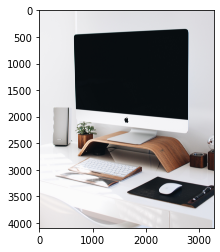


10 Web entities found: 


{0: 'iMac',
 1: 'MacBook',
 2: 'Computer',
 3: 'Desktop Computer',
 4: 'Apple',
 5: '',
 6: 'Apple',
 7: '5K resolution',
 8: 'Software',
 9: '4K resolution'}

In [12]:
# Doing a test

image_uri = 'https://upload.wikimedia.org/wikipedia/commons/8/8a/Gabriel_Beaudry%27s_desk_setup_%28Unsplash%29.jpg'
#image_uri = 'https://www.publicdomainpictures.net/pictures/280000/nahled/dog-with-human-body.jpg'

show_image(image_uri)

conver_list(report(annotate(image_uri)))

In [ ]:
from flask import Flask, request, jsonify, make_response
import requests
from twilio.twiml.messaging_response import Body, Message, MessagingResponse
from flask_ngrok import run_with_ngrok
import os
from twilio.rest import Client
from google.cloud import vision

#https://api.whatsapp.com/send/?phone=14155238886

app = Flask(__name__)
run_with_ngrok(app)


@app.route("/whatsapp", methods=["POST"])
def reply_whatsapp():

    global desc
    desc = ''

    global num
    num = 0

    incoming_msg = request.values.get('Body', '').lower()
    print("\n===========================")
    print("MENSAJE RECIBIDO: ", incoming_msg)
    print("===========================")
    response = MessagingResponse()
    msg = response.message()
    responded = False

    try:
        num_media = int(request.values.get("NumMedia"))
    except (ValueError, TypeError):
        return "Solicitud no válida: parámetro NumMedia no válido o faltante", 400

    if not num_media:
        msg_resp = 'Enviame una imagen'
        msg.body(msg_resp)
        responded = True
    else:
        image_url = request.values['MediaUrl0']
        msg_resp = conver_list(report(annotate(image_url)))
        print(msg_resp)
        msg.body(msg_resp)
        responded = True 

    if not responded:
        msg.body('Lo siento, no he podido interpretar la solicitud.')
    return str(response)

if __name__ == "__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e06d-34-136-116-180.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [22/Oct/2022 07:55:42] "POST /whatsapp HTTP/1.1" 200 -



MENSAJE RECIBIDO:  hola

MENSAJE RECIBIDO:  


INFO:werkzeug:127.0.0.1 - - [22/Oct/2022 07:55:59] "POST /whatsapp HTTP/1.1" 200 -



10 Web entities found: 
{0: 'iMac', 1: 'MacBook', 2: 'Apple', 3: '', 4: 'Desktop Computer', 5: '4K resolution', 6: 'Computer', 7: '5K resolution', 8: 'Software', 9: 'Apple keyboards'}

MENSAJE RECIBIDO:  


INFO:werkzeug:127.0.0.1 - - [22/Oct/2022 07:56:15] "POST /whatsapp HTTP/1.1" 200 -



10 Web entities found: 
{0: 'Hino Motors', 1: 'Isuzu Motors Ltd.', 2: 'Car', 3: 'Fuso', 4: '', 5: 'Truck', 6: '', 7: 'Hino', 8: 'Hino Profia', 9: ''}

MENSAJE RECIBIDO:  


INFO:werkzeug:127.0.0.1 - - [22/Oct/2022 07:56:53] "POST /whatsapp HTTP/1.1" 200 -



10 Web entities found: 
{0: 'Colombia', 1: 'Flag of Colombia', 2: 'United States of Colombia', 3: 'Flag', 4: '', 5: 'Coat of arms of Colombia', 6: 'National flag', 7: '', 8: 'Map', 9: 'Tricolour'}
